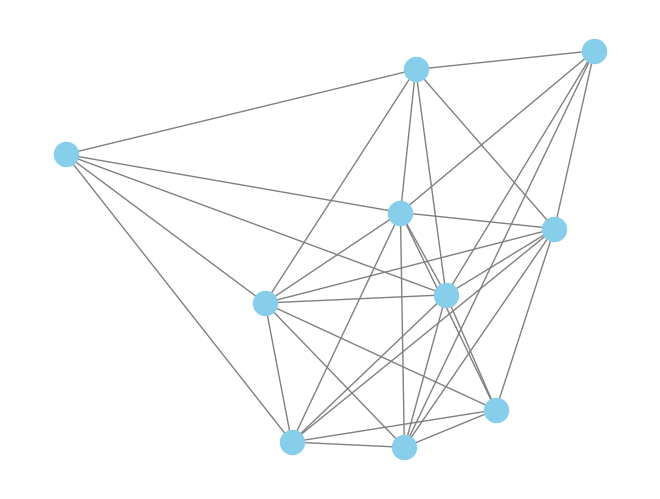

In [15]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Leer el archivo con headers en las columnas
df = pd.read_csv("network_col1_day1.txt")

# Asumimos que es una matriz cuadrada: el número de filas debe coincidir con el número de columnas
# Asignamos los mismos nombres como índices (etiquetas de fila)
df.index = df.columns
df = df.iloc[0:10, 0:10]  # Las primeras 5 filas y columnas

# Crear el grafo desde la matriz de adyacencia
G = nx.from_pandas_adjacency(df)

# Dibujar el grafo
nx.draw(G, with_labels=False, node_color='skyblue', edge_color='gray')
plt.show()



        Ant518  Ant527  Ant530  Ant538  Ant540  Ant552  Ant560  Ant564  \
Ant518       0       5       7       0       1       0       8       4   
Ant527       5       0      10       0       2       1       2       2   
Ant530       7      10       0       0       0       0      46       0   
Ant538       0       0       0       0       5       1       2       2   
Ant540       1       2       0       5       0      13       1       3   
Ant552       0       1       0       1      13       0       2       8   
Ant560       8       2      46       2       1       2       0       2   
Ant564       4       2       0       2       3       8       2       0   
Ant593       2       0       1       1       3       6       1       4   
Ant599      14       1       2       8       1       2       8      11   
Ant614       1       2       1      15      31      14       1       7   
Ant620       0       0       1       3      10       1       1       1   
Ant621       8       4      24       0

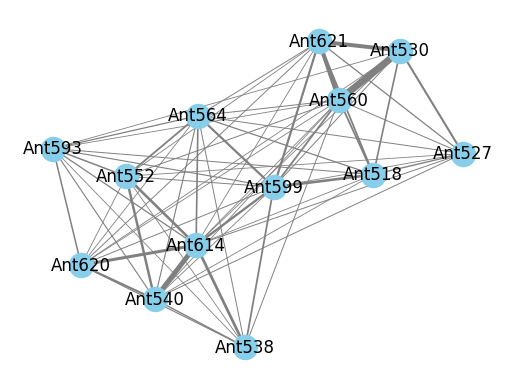

In [49]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
# Leer matriz y construir grafo
df = pd.read_csv("network_col1_day1.txt")
df.index = df.columns

def ordenar_ant(label):
    # Extrae el número tras "Ant"
    return int(label.replace("Ant", ""))

# Ordenar filas
df = df.iloc[sorted(range(len(df)), key=lambda i: ordenar_ant(df.index[i]))]

# Ordenar columnas igual que filas (índices)
cols_ordenadas = sorted(df.columns, key=ordenar_ant)
df = df[cols_ordenadas]

# Asegurar que el índice refleje orden
df.index = [df.columns[i] for i in range(len(df.columns))]
df = df.iloc[100:200, 100:200] 
print(df)
G = nx.from_pandas_adjacency(df)

pos = nx.spring_layout(G)

# Extraer pesos (atributo 'weight') para cada arista
weights = [G[u][v]['weight'] for u, v in G.edges()]

# Opcional: escalar los pesos para que los grosores sean visibles y no muy finos o gruesos
max_weight = max(weights)
min_linewidth = 0.5
max_linewidth = 5
scaled_weights = [min_linewidth + (w / max_weight) * (max_linewidth - min_linewidth) for w in weights]

# Dibujar nodos
nx.draw_networkx_nodes(G, pos, node_color='skyblue')

# Dibujar aristas con grosor según peso escalado
nx.draw_networkx_edges(G, pos, width=scaled_weights, edge_color='gray')

# Etiquetas de nodos
nx.draw_networkx_labels(G, pos)

plt.axis('off')
plt.show()


In [50]:
clustering = nx.clustering(G, weight='weight')
promedio_clustering = nx.average_clustering(G, weight='weight')
print(promedio_clustering)


0.0812091733955474


{'Ant518': 0, 'Ant527': 2, 'Ant530': 2, 'Ant538': 1, 'Ant540': 1, 'Ant552': 1, 'Ant560': 2, 'Ant564': 0, 'Ant593': 1, 'Ant599': 0, 'Ant614': 1, 'Ant620': 1, 'Ant621': 2}
Comunidades detectadas: 3


C:\Users\samcr\AppData\Local\Temp\ipykernel_21244\3156515052.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', num_comunidades)


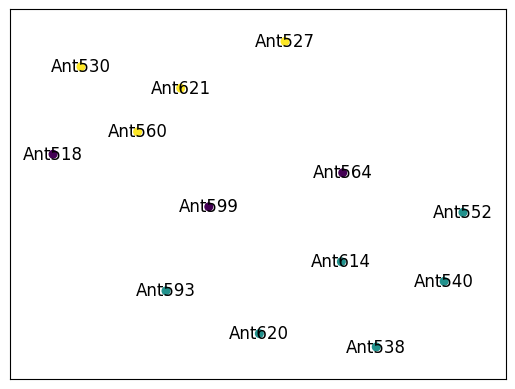

In [51]:
import community as community_louvain
import networkx as nx
import matplotlib.pyplot as plt

# Suponiendo que ya tienes el grafo G
# Detectar comunidades

particion = community_louvain.best_partition(G, weight='weight')

# 'particion' es un diccionario nodo -> número de comunidad
print(particion)

# Para ver cuántas comunidades se encontraron
num_comunidades = len(set(particion.values()))
print(f"Comunidades detectadas: {num_comunidades}")

# Visualizar la red con colores según comunidad
pos = nx.spring_layout(G)

# Crear lista de colores para cada nodo según su comunidad
import matplotlib.cm as cm
cmap = cm.get_cmap('viridis', num_comunidades)
colors = [cmap(particion[node]) for node in G.nodes()]

nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=30)
nx.draw_networkx_edges(G, pos, alpha=0)
nx.draw_networkx_labels(G, pos)

plt.show()


Columnas encontradas: ['x_coor', 'y_coor', 'nb_visits']


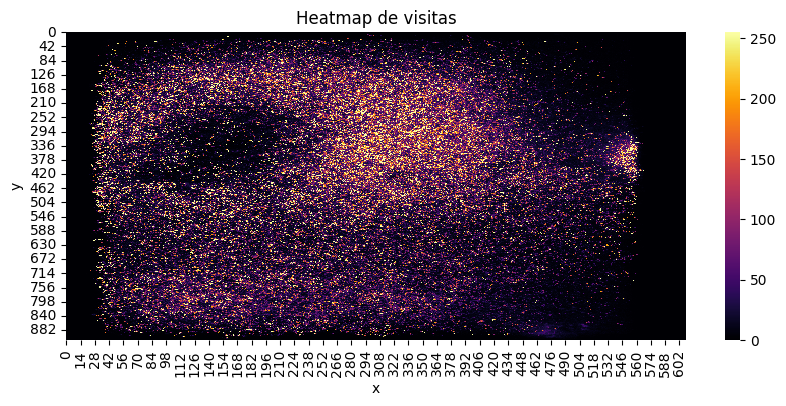

Columnas encontradas: ['x_coor', 'y_coor', 'nb_visits']


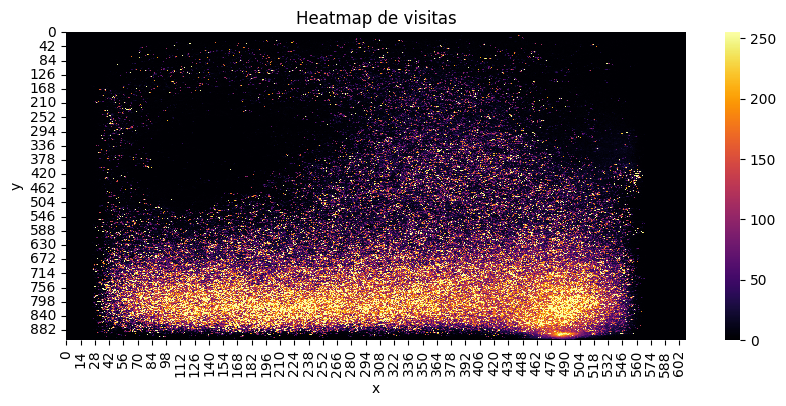

Columnas encontradas: ['x_coor', 'y_coor', 'nb_visits']


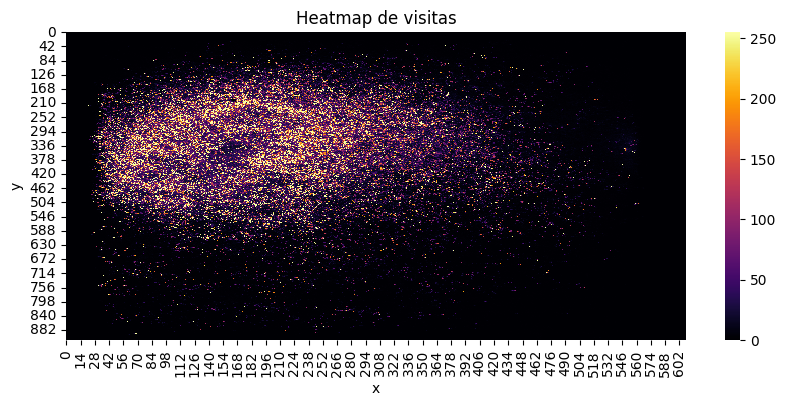

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo con encabezados
df = pd.read_csv('heatmap_col1_cleaners.txt')

# Verificar columnas leídas
print("Columnas encontradas:", df.columns.tolist())

# Pivotar la tabla solo si las columnas esperadas están presentes
if set(['x_coor', 'y_coor', 'nb_visits']).issubset(df.columns):
    heatmap_data = df.pivot(index='y_coor', columns='x_coor', values='nb_visits')
    heatmap_data = heatmap_data.sort_index(ascending=True)

    # Graficar
    plt.figure(figsize=(10, 4))
    sns.heatmap(heatmap_data, cmap='inferno', cbar=True, linewidths=0, linecolor='gray')
    plt.title('Heatmap de visitas')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
else:
    print("❌ Las columnas 'x_coor', 'y_coor', 'nb_visits' no están presentes en el archivo.")

# Leer el archivo con encabezados
df = pd.read_csv('heatmap_col1_foragers.txt')

# Verificar columnas leídas
print("Columnas encontradas:", df.columns.tolist())

# Pivotar la tabla solo si las columnas esperadas están presentes
if set(['x_coor', 'y_coor', 'nb_visits']).issubset(df.columns):
    heatmap_data = df.pivot(index='y_coor', columns='x_coor', values='nb_visits')
    heatmap_data = heatmap_data.sort_index(ascending=True)

    # Graficar
    plt.figure(figsize=(10, 4))
    sns.heatmap(heatmap_data, cmap='inferno', cbar=True, linewidths=0, linecolor='gray')
    plt.title('Heatmap de visitas')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
else:
    print("❌ Las columnas 'x_coor', 'y_coor', 'nb_visits' no están presentes en el archivo.")
    # Leer el archivo con encabezados
df = pd.read_csv('heatmap_col1_nurses.txt')

# Verificar columnas leídas
print("Columnas encontradas:", df.columns.tolist())

# Pivotar la tabla solo si las columnas esperadas están presentes
if set(['x_coor', 'y_coor', 'nb_visits']).issubset(df.columns):
    heatmap_data = df.pivot(index='y_coor', columns='x_coor', values='nb_visits')
    heatmap_data = heatmap_data.sort_index(ascending=True)

    # Graficar
    plt.figure(figsize=(10, 4))
    sns.heatmap(heatmap_data, cmap='inferno', cbar=True, linewidths=0, linecolor='gray')
    plt.title('Heatmap de visitas')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
else:
    print("❌ Las columnas 'x_coor', 'y_coor', 'nb_visits' no están presentes en el archivo.")

